In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/deep-learning/main/aps_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [ ]:
data.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [ ]:
import numpy as np
data.replace('na', np.NaN, inplace = True)

In [ ]:
data.isnull().sum().sum()

71649

In [ ]:
pd.options.display.max_rows= 1000

In [ ]:
data.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [ ]:
dataset = pd.DataFrame(data.isnull().sum().sort_values(ascending = False).rename({0:'Null Value Count'}))

In [ ]:
dataset.head()

,0
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849


In [ ]:
dataset.rename(columns={0:'missing null value counts'}, inplace=True)


In [ ]:
dataset.head()

,missing null value counts
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849


In [ ]:
##filling null values|
feature_with_null_values = [feature for feature in data.columns if data[feature].isnull().sum()>1 ]

In [ ]:
feature_with_null_values

['ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 'cf_000',
 

In [ ]:
len(feature_with_null_values)

169

In [ ]:
for feature in feature_with_null_values:
  data[feature] = data[feature].fillna(data[feature].median())

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
X = data.drop('class', axis = 1)

In [ ]:
y = data['class']

In [ ]:
X.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [ ]:
y

0       neg
1       neg
2       neg
3       neg
4       neg
       ... 
4995    neg
4996    neg
4997    neg
4998    neg
4999    neg
Name: class, Length: 5000, dtype: object

In [ ]:
y = pd.get_dummies(y,drop_first= True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(3350, 170)

In [ ]:
y_train.shape

(3350, 1)

In [ ]:
X_test.shape

(1650, 170)

In [ ]:
y_test.shape

(1650, 1)

In [ ]:
y

,pos
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [ ]:
 ##since we will be using optimizer--->gradient descent, we will do scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
scaled_X_train = sc.fit_transform(X_train)

In [ ]:
scaled_X_test = sc.transform(X_test)

In [ ]:
scaled_X_train

array([[-2.06287370e-01, -8.25109814e-02, -4.27679410e-01, ...,
         5.91430026e-01, -3.12912608e-02, -3.64654506e-02],
       [-1.96839055e-01, -8.25109814e-02, -4.27679633e-01, ...,
        -2.30987477e-01, -3.12912608e-02, -3.64654506e-02],
       [-3.77225263e-01, -8.25109814e-02, -4.27679781e-01, ...,
        -2.30987477e-01, -3.12912608e-02, -3.64654506e-02],
       ...,
       [ 4.73062318e+00, -8.25109814e-02, -4.27679633e-01, ...,
        -1.35246067e-01, -3.12912608e-02, -3.64654506e-02],
       [-3.39119043e-03, -8.25109814e-02,  2.33820048e+00, ...,
        -2.30987477e-01, -3.12912608e-02, -3.64654506e-02],
       [ 6.11221698e-01, -8.25109814e-02, -4.27679184e-01, ...,
         3.10030367e-01, -3.12912608e-02, -3.64654506e-02]])

In [ ]:
scaled_X_test

array([[-0.14157918, -0.08251098, -0.42767902, ..., -0.19804224,
        -0.03129126, -0.03646545],
       [-0.1520234 , -0.08251098, -0.42767948, ..., -0.21102618,
        -0.03129126, -0.03646545],
       [-0.14710772, -0.08251098, -0.42767971, ...,  0.4544919 ,
        -0.03129126, -0.03646545],
       ...,
       [-0.02648849, -0.08251098, -0.42767819, ...,  0.24019617,
        -0.03129126, -0.03646545],
       [-0.01391202, -0.08251098, -0.42767953, ..., -0.03950466,
        -0.03129126, -0.03646545],
       [-0.39338954, -0.08251098, -0.42767981, ..., -0.23098748,
        -0.03129126, -0.03646545]])

In [ ]:
## build a tensorflow model

In [ ]:
import tensorflow.keras

In [ ]:
 from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
 ## building model

In [ ]:
classifier = Sequential()
classifier.add(Dense(units =10,kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 170 ))

classifier.add(Dense(units =10,kernel_initializer = 'he_uniform', activation = 'relu'))

# classifier.add(Dense(units =1,kernel_initializer = 'glorat_uniform',  activation = 'sigmoid' ))

In [ ]:
classifier.add(Dense(units =1,kernel_initializer = 'glorot_uniform',  activation = 'sigmoid' ))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = classifier.fit(scaled_X_train,y_train, batch_size = 100, epochs = 30, validation_split = 0.25)

Epoch 1/30
26/26 [==============================] - 5s 27ms/step - loss: 0.3836 - accuracy: 0.9566 - val_loss: 0.2698 - val_accuracy: 0.9714
Epoch 2/30
26/26 [==============================] - 0s 12ms/step - loss: 0.2131 - accuracy: 0.9809 - val_loss: 0.1717 - val_accuracy: 0.9785
Epoch 3/30
26/26 [==============================] - 0s 8ms/step - loss: 0.1399 - accuracy: 0.9833 - val_loss: 0.1215 - val_accuracy: 0.9809
Epoch 4/30
26/26 [==============================] - 0s 8ms/step - loss: 0.1006 - accuracy: 0.9853 - val_loss: 0.0931 - val_accuracy: 0.9821
Epoch 5/30
26/26 [==============================] - 0s 9ms/step - loss: 0.0783 - accuracy: 0.9873 - val_loss: 0.0788 - val_accuracy: 0.9833
Epoch 6/30
26/26 [==============================] - 0s 7ms/step - loss: 0.0652 - accuracy: 0.9881 - val_loss: 0.0691 - val_accuracy: 0.9845
Epoch 7/30
26/26 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.9877 - val_loss: 0.0621 - val_accuracy: 0.9833
Epoch 8/30
26/26 [

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model_history.history['accuracy']

[0.9566082954406738,
 0.9808917045593262,
 0.9832802414894104,
 0.9852706789970398,
 0.987261176109314,
 0.9880573153495789,
 0.987659215927124,
 0.9892516136169434,
 0.9892516136169434,
 0.9904458522796631,
 0.9908439517021179,
 0.9916401505470276,
 0.9904458522796631,
 0.9916401505470276,
 0.9932324886322021,
 0.9924362897872925,
 0.9952229261398315,
 0.9956210255622864,
 0.9952229261398315,
 0.9952229261398315,
 0.9960191249847412,
 0.9956210255622864,
 0.9956210255622864,
 0.9968152642250061,
 0.9972133636474609,
 0.9972133636474609,
 0.9976114630699158,
 0.9972133636474609,
 0.9976114630699158,
 0.9976114630699158]

In [ ]:
y_pred = classifier.predict(scaled_X_test)

52/52 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[0.00034214],
       [0.00043738],
       [0.00055317],
       ...,
       [0.00217266],
       [0.00105412],
       [0.00027735]], dtype=float32)

In [ ]:
y_pred = y_pred>0.05

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt

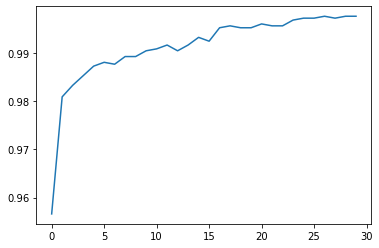

In [ ]:
plt.plot(model_history.history['accuracy'])


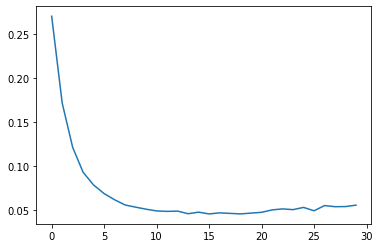

In [ ]:
plt.plot(model_history.history['val_loss'])

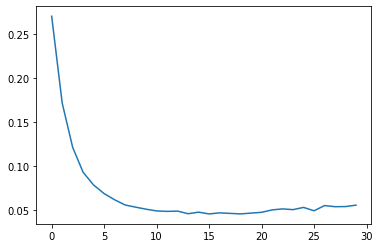

In [ ]:
plt.plot(model_history.history['val_loss'])

In [ ]:
accuracy_score(y_pred, y_test)

0.9672727272727273

In [ ]:
y_test1 = y_test>0.05

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
accuracy_score(y_pred, y_test1)

0.9672727272727273

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred = y_pred, y_true = y_test)

array([[1577,   43],
       [  11,   19]])

In [ ]:
## hyper parameter tuner using keras tuner

In [ ]:
pip install keras-tuner --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.6 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-68-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units =10,kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 170 ))
  model.add(Dense(units =10,kernel_initializer = 'he_uniform', activation = 'relu'))
  model.add(Dense(units =1,kernel_initializer = 'glorot_uniform',  activation = 'sigmoid' )) 

  optimizer = hp.Choice("optimizer", values = ["adam", "sgd","rmsprop",'adadelta'])

  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model
  

In [ ]:
random_search = RandomSearch(build_model, objective = 'val_accuracy', max_trials=5)

In [ ]:
random_search

In [ ]:
random_search = RandomSearch(build_model, objective = 'val_accuracy', max_trials=5)

In [ ]:
random_search.search(scaled_X_train,y_train, validation_data = (scaled_X_test,y_test ))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.9806060791015625

Best val_accuracy So Far: 0.9818181991577148
Total elapsed time: 00h 00m 06s


In [ ]:
random_search.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [ ]:
my_model =random_search.get_best_models(num_models=1)[0]

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def build_model1(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

In [ ]:
random_search = RandomSearch(build_model1, objective = 'val_accuracy', max_trials=5)

In [ ]:
random_search.search(scaled_X_train,y_train, validation_data = (scaled_X_test,y_test ),directory = 'tuner')

In [ ]:
random_search.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}